In [29]:
#Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
#Importing the data
file = '/content/drive/MyDrive/ProjectData/ai4i2020.csv'
data = pd.read_csv(file)

In [32]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [34]:
# Setting numeric columns dtype to float
data['Tool wear [min]'] = data['Tool wear [min]'].astype('float64')
data['Rotational speed [rpm]'] = data['Rotational speed [rpm]'].astype('float64')

In [35]:
print(data.isnull().sum())

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


In [36]:
print(data.describe())

               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000   

In [37]:
#Encoding and dropping ID columns
df = data.copy()
df['Type'].replace(to_replace={'L': 0, 'M': 1, 'H': 2}, inplace=True)
df.drop(columns=['UDI','Product ID'], inplace=True)

In [38]:
features = [col for col in df.columns if df[col].dtype=='float64' or col =='Type']

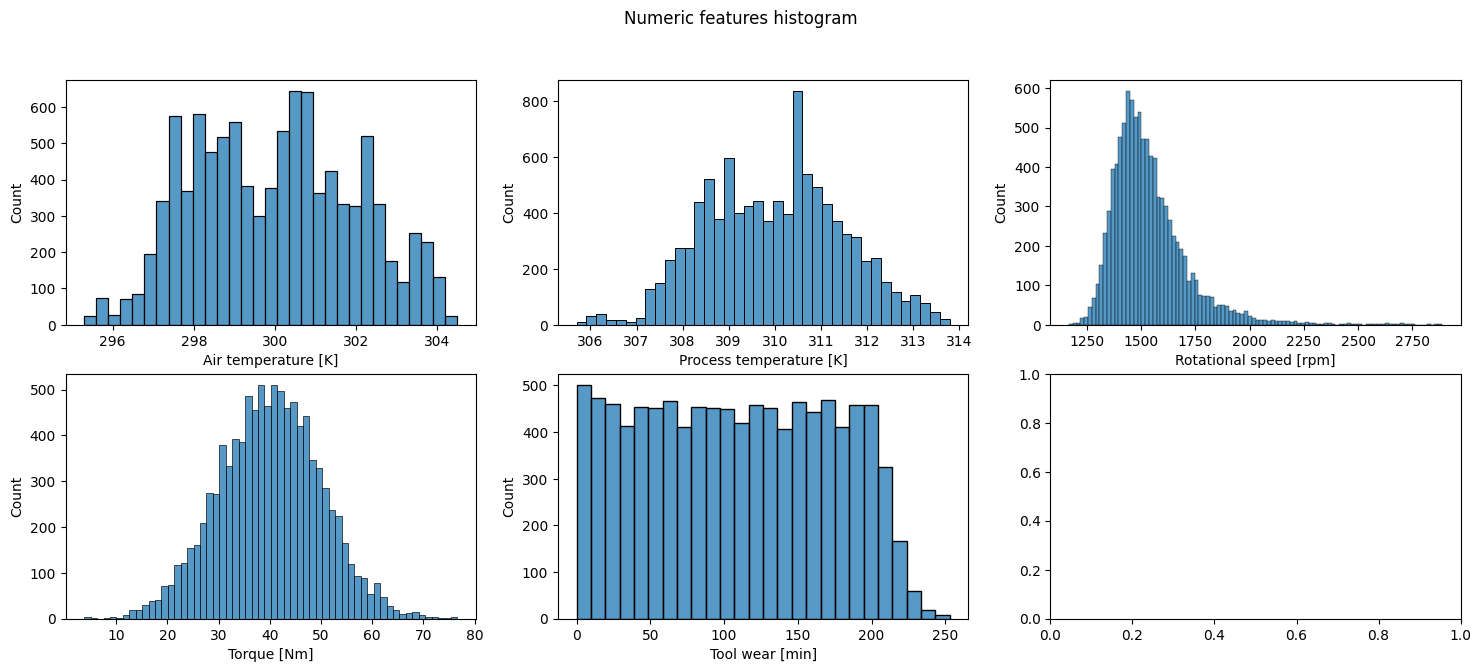

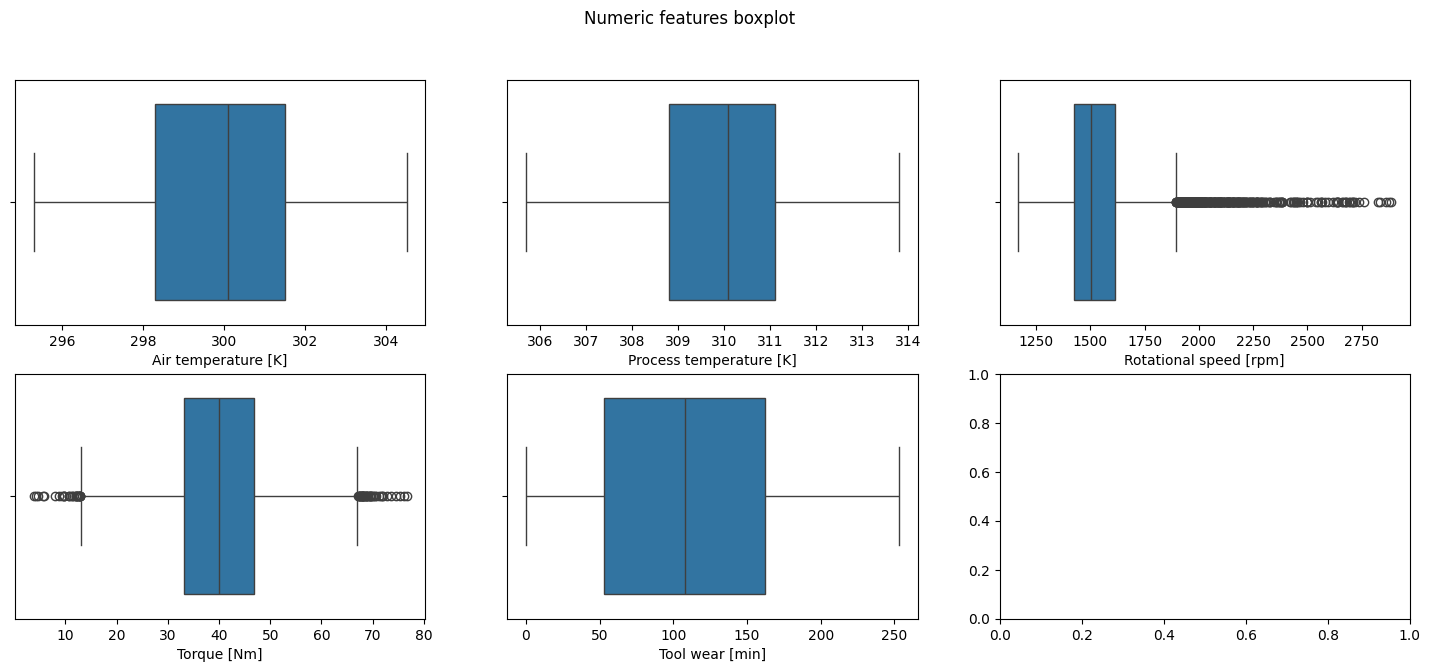

In [39]:
num_features = [feature for feature in features if df[feature].dtype=='float64']
# Histograms of numeric features
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18,7))
fig.suptitle('Numeric features histogram')
for j, feature in enumerate(num_features):
    sb.histplot(ax=axs[j//3, j-3*(j//3)], data=df, x=feature)
plt.show()

# boxplot of numeric features
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18,7))
fig.suptitle('Numeric features boxplot')
for j, feature in enumerate(num_features):
    sb.boxplot(ax=axs[j//3, j-3*(j//3)], data=df, x=feature)
plt.show()

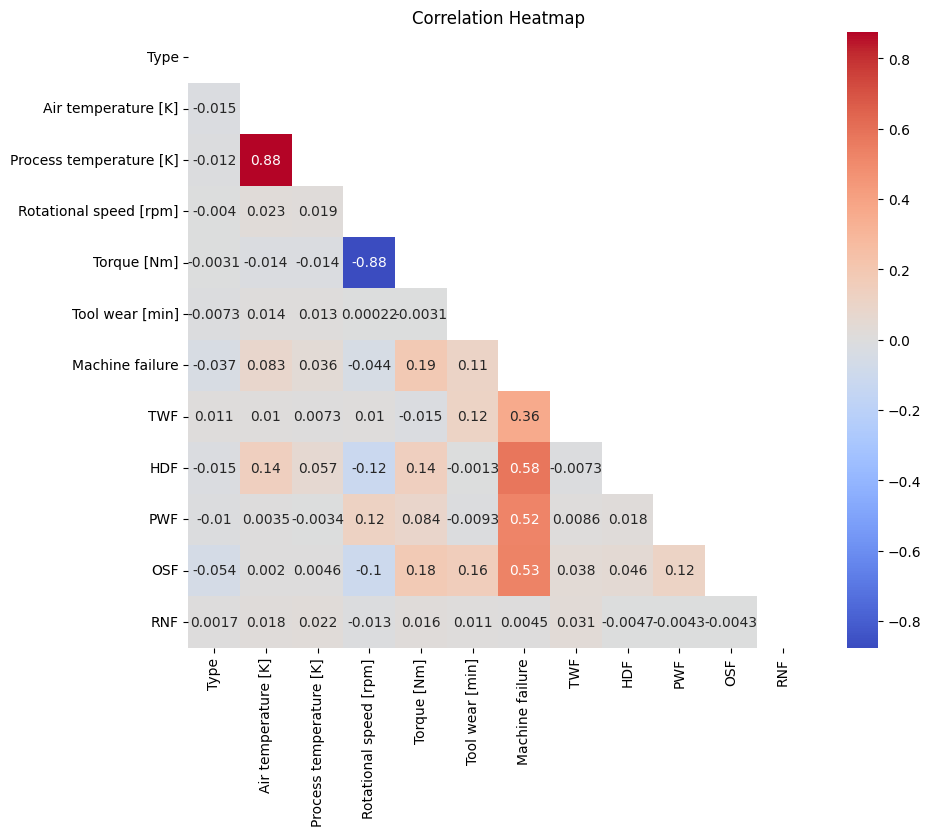

In [40]:
#Correlation Heat Map
plt.figure(figsize=(10,8))
sb.heatmap(data=df.corr(), mask=np.triu(df.corr()), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In our models we take into consideration:

Multicollinearity: Avoid including variables that are highly correlated with each other (if two variables have a correlation close to 1 or -1)

Correlation with the Target Variable: The variables that have a higher correlation with the target variable are: Machine failure, TWF, HDF, PWF, OSF, and RNF.

In [41]:
X = df[features]
y = df['Machine failure']

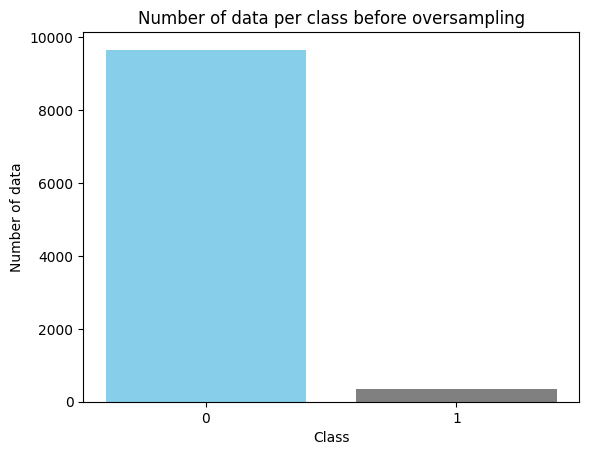

In [42]:
# Calculate the number of data in each class
counts = np.bincount(y)

# Creating a bar chart to display counts
classes = [0, 1]
plt.bar(classes, counts, tick_label=classes, color=['Skyblue', 'gray'])
plt.title('Number of data per class before oversampling')
plt.xlabel('Class')
plt.ylabel('Number of data')
plt.show()

We noticed that the number of data in the two classes "0" and "1" are very different. This will give us overfitting in our models. The suitable solution for this problem is to do Oversampling

In [43]:
from imblearn.over_sampling import SMOTE

# Class rebalancing with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

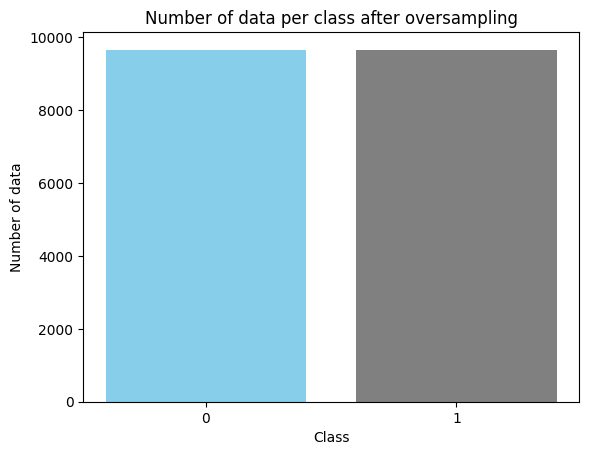

In [44]:
# Calculate the number of data in each class
counts = np.bincount(y_resampled)

# Creating a bar chart to display counts
classes = [0, 1]
plt.bar(classes, counts, tick_label=classes, color=['Skyblue', 'gray'])
plt.title('Number of data per class after oversampling')
plt.xlabel('Class')
plt.ylabel('Number of data')
plt.show()

In [51]:
X_resampled_array = X_resampled.values

X_resampled_reshaped = X_resampled_array.reshape((X_resampled_array.shape[0], 1, X_resampled_array.shape[1]))

In [52]:
from sklearn.model_selection import train_test_split

# Splitting oversampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_reshaped, y_resampled, test_size=0.2, random_state=84)

In [54]:
print(X_train.shape)
print(X_test.shape)

(15457, 1, 6)
(3865, 1, 6)


In [55]:
# Feature Scaling(LSTM is less sensitive to it)
from sklearn.preprocessing import StandardScaler

X_train_stand = X_train.reshape(15457, 6).copy()
X_test_stand = X_test.reshape(3865, 6).copy()

# apply standardization on numerical features
for i in range(6):

    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])

    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])

    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [57]:
X_train_stand = X_train_stand.reshape(15457, 1, 6)
X_test_stand = X_test_stand.reshape(3865, 1, 6)

In [58]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Construction of the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(1, X_train_stand.shape[2])))
model.add(LSTM(50))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model training
model.fit(X_train_stand, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
435/435 [==============================] - 6s 6ms/step - loss: 0.4803 - accuracy: 0.7894 - val_loss: 0.3620 - val_accuracy: 0.8512
Epoch 2/10
435/435 [==============================] - 2s 4ms/step - loss: 0.3730 - accuracy: 0.8397 - val_loss: 0.3444 - val_accuracy: 0.8655
Epoch 3/10
435/435 [==============================] - 3s 6ms/step - loss: 0.3648 - accuracy: 0.8446 - val_loss: 0.3696 - val_accuracy: 0.8486
Epoch 4/10
435/435 [==============================] - 3s 7ms/step - loss: 0.3734 - accuracy: 0.8360 - val_loss: 0.3678 - val_accuracy: 0.8493
Epoch 5/10
435/435 [==============================] - 2s 5ms/step - loss: 0.3506 - accuracy: 0.8482 - val_loss: 0.3304 - val_accuracy: 0.8583
Epoch 6/10
435/435 [==============================] - 2s 4ms/step - loss: 0.3468 - accuracy: 0.8500 - val_loss: 0.3433 - val_accuracy: 0.8603
Epoch 7/10
435/435 [==============================] - 2s 4ms/step - loss: 0.3565 - accuracy: 0.8419 - val_loss: 0.3650 - val_accuracy: 0.8338
Epoch 

In [59]:
# Model evaluation on test set
model.evaluate(X_test_stand, y_test)

121/121 [==============================] - 0s 2ms/step - loss: 0.3375 - accuracy: 0.8349


[0.33745115995407104, 0.8349288702011108]

In [60]:
# Model evaluation
loss, accuracy = model.evaluate(X_test_stand, y_test)

# Displaying results
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy * 100:.2f}%')

121/121 [==============================] - 0s 2ms/step - loss: 0.3375 - accuracy: 0.8349
Loss: 0.3375
Accuracy: 83.49%


121/121 [==============================] - 1s 2ms/step


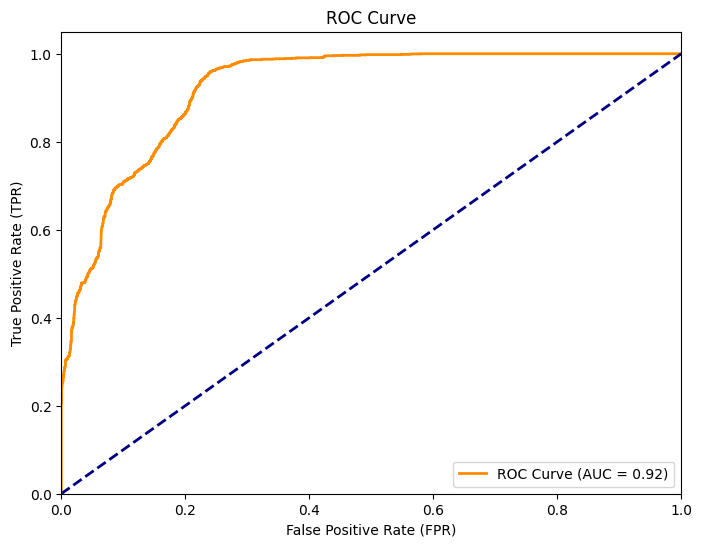

In [61]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Positive class probability prediction (class 1)
y_pred_prob = model.predict(X_test_stand)

# Calculation of ROC AUC value
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Calculation of false positive and true positive rates for different threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predicting labels for test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Converting test labels to binary classes (if they are not already)
y_test_classes = (y_test > 0.5).astype(int)

# Calculating accuracy
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print(f"Confusion matrix:\n{conf_matrix}")

# Generating classification report
class_report = classification_report(y_test_classes, y_pred_classes)
print(f"Classification Report:\n{class_report}")

121/121 [==============================] - 1s 6ms/step
Accuracy: 0.8357
Confusion matrix:
[[1549  397]
 [ 238 1681]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1946
           1       0.81      0.88      0.84      1919

    accuracy                           0.84      3865
   macro avg       0.84      0.84      0.84      3865
weighted avg       0.84      0.84      0.84      3865



**Using Random Forest Classifier**

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
X = df[features]
y = df['Machine failure']

# Oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Decision trees (the base model of Random Forest) make decisions on features independently at each node. The splitting of nodes depends on finding the feature that best separates the data. So feature scaling will have no to very less impact and hence we have not done it.

In [66]:
# Creating and training the model
model = RandomForestClassifier(random_state=84)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=84)

In [67]:
# Making predictions and evaluate the model
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
print("AUC-ROC:", roc_auc_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1934
           1       0.97      0.99      0.98      1931

    accuracy                           0.98      3865
   macro avg       0.98      0.98      0.98      3865
weighted avg       0.98      0.98      0.98      3865

AUC-ROC: 0.9780147776682302
